# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key

In [7]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
set_counter = 1

for city in cities:
    weather_response = requests.get(query_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
     
    try:
        cityname.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        
        if count > 49:
            count = 0
            set_counter = set_counter + 1
    
        else:
            count = count + 1
            
        print(f"Processing record {count} of Set {set_counter} | {city}")
        
    except:
        print("Record not found") 
        
       
print("-----------------------------")        
print("Data Retrieval Complete")

Processing record 1 of Set 1 | gondanglegi
Processing record 2 of Set 1 | vao
Processing record 3 of Set 1 | rikitea
Processing record 4 of Set 1 | bredasdorp
Processing record 5 of Set 1 | bethel
Processing record 6 of Set 1 | faanui
Processing record 7 of Set 1 | cape town
Processing record 8 of Set 1 | broken hill
Processing record 9 of Set 1 | lavrentiya
Processing record 10 of Set 1 | bengkulu
Processing record 11 of Set 1 | butaritari
Processing record 12 of Set 1 | port augusta
Processing record 13 of Set 1 | narsaq
Processing record 14 of Set 1 | sitka
Processing record 15 of Set 1 | haapiti
Record not found
Processing record 16 of Set 1 | grand gaube
Processing record 17 of Set 1 | kachiry
Processing record 18 of Set 1 | victoria
Processing record 19 of Set 1 | dikson
Processing record 20 of Set 1 | cabedelo
Processing record 21 of Set 1 | lake charles
Processing record 22 of Set 1 | torbay
Processing record 23 of Set 1 | cabo san lucas
Processing record 24 of Set 1 | albany
P

Processing record 42 of Set 4 | puerto colombia
Processing record 43 of Set 4 | cayenne
Processing record 44 of Set 4 | port keats
Processing record 45 of Set 4 | coquimbo
Processing record 46 of Set 4 | salym
Processing record 47 of Set 4 | nata
Processing record 48 of Set 4 | copiapo
Processing record 49 of Set 4 | lukovetskiy
Processing record 50 of Set 4 | barra do garcas
Record not found
Processing record 0 of Set 5 | bathsheba
Processing record 1 of Set 5 | cururupu
Processing record 2 of Set 5 | necochea
Record not found
Processing record 3 of Set 5 | coihaique
Record not found
Processing record 4 of Set 5 | tateyama
Processing record 5 of Set 5 | beinamar
Processing record 6 of Set 5 | evensk
Processing record 7 of Set 5 | pedernales
Processing record 8 of Set 5 | east london
Processing record 9 of Set 5 | sibolga
Processing record 10 of Set 5 | zadonsk
Processing record 11 of Set 5 | guane
Processing record 12 of Set 5 | ust-nera
Processing record 13 of Set 5 | kendari
Record 

Processing record 31 of Set 8 | iqaluit
Processing record 32 of Set 8 | okhotsk
Processing record 33 of Set 8 | sao sebastiao
Processing record 34 of Set 8 | imeni poliny osipenko
Processing record 35 of Set 8 | chuncheng
Processing record 36 of Set 8 | itarema
Processing record 37 of Set 8 | sao joao da barra
Processing record 38 of Set 8 | sokoni
Processing record 39 of Set 8 | jiuquan
Processing record 40 of Set 8 | pacific grove
Processing record 41 of Set 8 | carauari
Processing record 42 of Set 8 | amapa
Processing record 43 of Set 8 | traralgon
Processing record 44 of Set 8 | valdemarpils
Processing record 45 of Set 8 | fayaoue
Processing record 46 of Set 8 | ust-ilimsk
Processing record 47 of Set 8 | mount gambier
Processing record 48 of Set 8 | mayumba
Processing record 49 of Set 8 | taikang
Record not found
Processing record 50 of Set 8 | derzhavinsk
Processing record 0 of Set 9 | oranjemund
Processing record 1 of Set 9 | san juan del sur
Processing record 2 of Set 9 | mersin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gondanglegi,-7.75,112.01,76.91,82,91,3.38,ID,1604329669
1,Vao,-22.67,167.48,73.74,90,100,8.30,NC,1604329670
2,Rikitea,-23.12,-134.97,72.64,83,80,20.92,PF,1604329670
3,Bredasdorp,-34.53,20.04,73.40,64,0,18.34,ZA,1604329670
4,Bethel,41.37,-73.41,39.00,51,44,11.01,US,1604329670


In [9]:
# Export the City_Data into a csv
weather_data.to_csv(r'my_weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data.count()

City          559
Latitude      559
Longitude     559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [11]:
#  Get the indices of cities that have humidity over 100%.
Index_label = weather_data[weather_data['Humidity']>100].index.tolist() 
print(Index_label)

[]


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

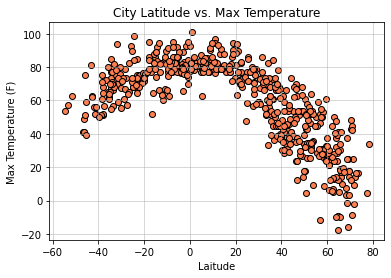

In [23]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], facecolor = "coral", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

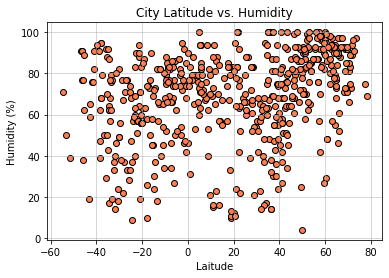

In [24]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolor = "coral", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

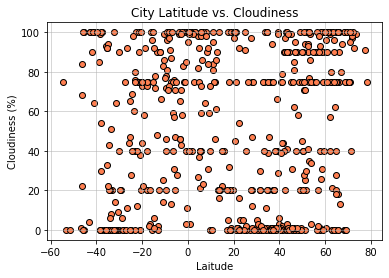

In [25]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolor = "coral", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

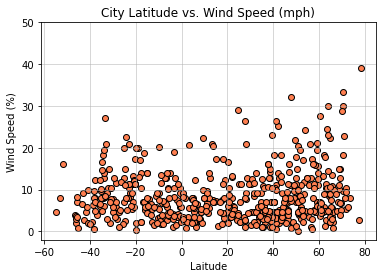

In [26]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolor = "coral", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [30]:
# # Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Latitude"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Latitude"] < 0]


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gondanglegi,-7.75,112.01,76.91,82,91,3.38,ID,1604329669
1,Vao,-22.67,167.48,73.74,90,100,8.30,NC,1604329670
2,Rikitea,-23.12,-134.97,72.64,83,80,20.92,PF,1604329670
3,Bredasdorp,-34.53,20.04,73.40,64,0,18.34,ZA,1604329670
5,Faanui,-16.48,-151.75,78.82,77,3,18.79,PF,1604329671


In [35]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.85


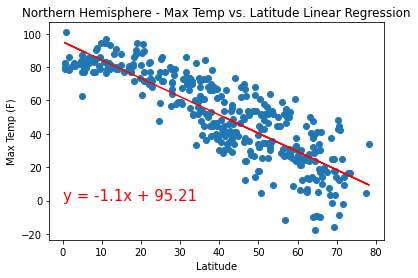

In [36]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.64


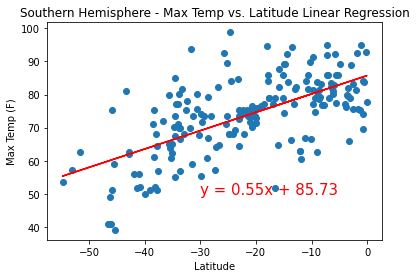

In [37]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


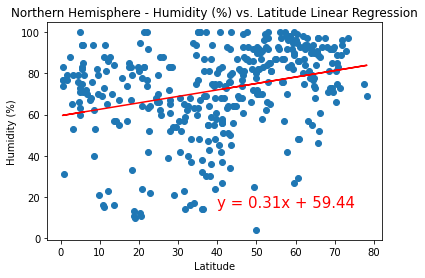

In [39]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08


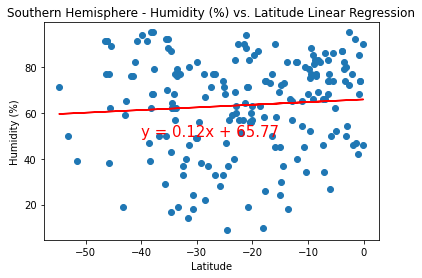

In [40]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.12


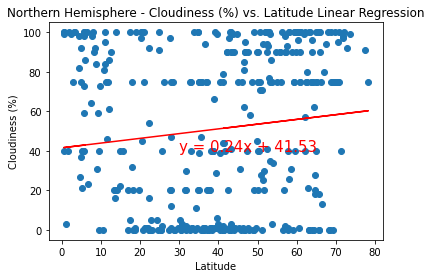

In [41]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.26


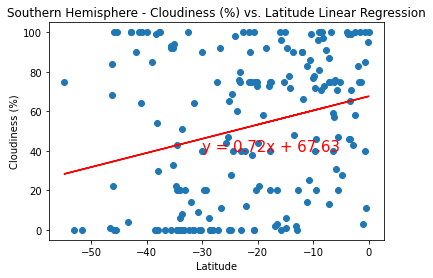

In [42]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.22


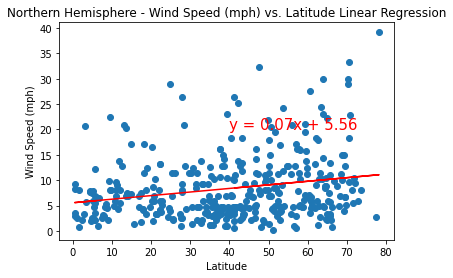

In [43]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Latitude"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.06


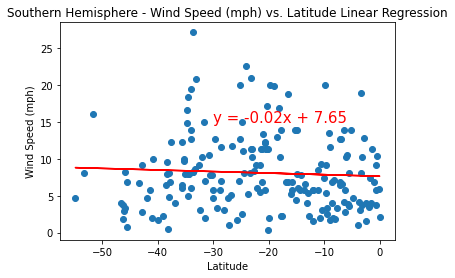

In [44]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Latitude"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")